In [59]:
import matplotlib.pyplot as plt
import imageio

In [60]:
import numpy as np
import keras
import keras.layers as layers

In [61]:
oam_img=np.zeros((560,256,320,1))

path1=['ds/s/p6/1_-5','ds/s/p6/-1_-7','ds/s/p6/2_-4','ds/s/p6/3_-3','ds/s/p6/4_-2','ds/s/p6/5_-1','ds/s/p6/7_1']

for i in range(7):
    for j in range(80):
        oam_img[i*80+j,:,:,0]=imageio.imread(path1[i]+'/'+str(f"{(1+j):03}")+'.png')
    
oam_label=np.zeros((560,7))
for i in range(7):
    oam_label[i*80:i*80+80,i]=1

In [62]:
import random
test=np.arange(1,560)
random.shuffle(test)

In [63]:
train_img=oam_img[test[:500]]
test_img=oam_img[test[500:]]
train_label=oam_label[test[:500]]
test_label=oam_label[test[500:]]

[1. 0. 0. 0. 0. 0. 0.]


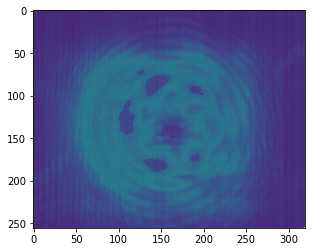

In [64]:
plt.imshow(oam_img[70])
print(oam_label[70])

In [65]:
num_classes = 7
input_shape = (256,320,1)

In [66]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 318, 16)      160       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1292352)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1292352)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 9046471   
Total params: 9,046,631
Trainable params: 9,046,631
Non-trainable params: 0
_________________________________________________________________


In [67]:
batch_size = 10
epochs = 60

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(train_img,train_label, batch_size=batch_size, epochs=epochs, validation_split=0.1,validation_data=(test_img,test_label))

Epoch 1/60
45/45 [==============================] - 5s 116ms/step - loss: 1508798.0000 - accuracy: 0.1778 - val_loss: 356566.4062 - val_accuracy: 0.2200
Epoch 2/60
45/45 [==============================] - 5s 115ms/step - loss: 113198.1094 - accuracy: 0.4711 - val_loss: 8629.1797 - val_accuracy: 0.9200
Epoch 3/60
45/45 [==============================] - 5s 115ms/step - loss: 14374.5879 - accuracy: 0.8356 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/60
45/45 [==============================] - 5s 114ms/step - loss: 13.8985 - accuracy: 0.9956 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/60
45/45 [==============================] - 5s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/60
45/45 [==============================] - 5s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/60
45/45 [==============================] - 5s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0

45/45 [==============================] - 5s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 56/60
45/45 [==============================] - 5s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 57/60
45/45 [==============================] - 5s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 58/60
45/45 [==============================] - 5s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 59/60
45/45 [==============================] - 5s 115ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 60/60
45/45 [==============================] - 5s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [58]:
model.predict(oam_img[1:2],batch_size=None)

array([[1.0000000e+00, 5.3228155e-27, 5.9173620e-27, 2.0405865e-31,
        6.3775465e-37, 1.9667189e-34, 8.9813866e-26]], dtype=float32)

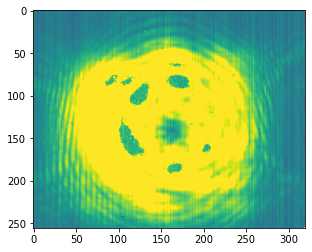

In [35]:
plt.imshow(oam_img[0])
